# Final Project IDX Partners Data Science

- Nama: Dimas Aji Haritson
- Data: loan_data_2007_2014

# Business Understanding

IDX Partners adala perusahaan yang bergerak pada bidang konsultasi yang analisa data dan keputusan yang mengintegrasikan resiko manajemen. Perusahaan IDX Partners ingin meningkatkan keakuratan dalam menilai dan mengelola risiko kredit untuk mengoptimalkan keputusan bisnis dan mengurangi potensi kerugian. 

### Permasalahan

Perusahaan ingin meningkatkan keakuratan dalam menilai dan mengelola risiko kredit untuk mengoptimalkan keputusan bisnis dan mengurangi potensi kerugian. Dengan memanfaatkan data historis pinjaman yang disetujui dan ditolak, tujuan utama proyek ini adalah untuk membangun model prediksi yang dapat secara akurat menilai risiko kredit calon peminjam.

### Tujuan

Membuat model prediksi risiko kredit untuk membantu mengurangi tingkat kredit macet dengan mengidentifikasi calon peminjam yang berisiko tinggi. 

### Analytical Approach

- Data Understanding: Memahami struktur data, mengidentifikasi missing values, dan menganalisis distribusi serta outliers
- Exploratory Data Analysis (EDA): Analisis korelasi, visualisasi kategori, dan pemahaman distribusi variabel target
- Data Preparation: Pembersihan data, encoding variabel kategorikal, skala data numerik, dan pembagian data menjadi set pelatihan dan pengujian
- Data Modelling: Membangun beberapa model machine learning seperti Logistic Regression, Random Forest, dan K-Nearest Neighbors.
- Evaluation: Mengevaluasi kinerja model dengan set data pengujian dan membandingkan metrik kinerja dari beberapa model

## LIBRARIES and Load Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

D:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7156\1028708547.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


## Data Understanding

In [3]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(466285, 75)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [7]:
# Melihat Missing Value

listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isnull().sum(), round((df[col].isnull().sum()/len(df[col]))*100, 2), df[col].nunique(), list(df[col].drop_duplicates().sample(5,replace=True).values)]);

df_desc = pd.DataFrame(columns=['Column', 'Dtype', 'null count', 'null perc.', 'unique count', 'unique sample'],
                     data=listItem)
df_desc

,Column,Dtype,null count,null perc.,unique count,unique sample
0,Unnamed: 0,int64,0,0.00,466285,"[240856, 390794, 437630, 239656, 192683]"
1,id,int64,0,0.00,466285,"[1177369, 36128265, 10566988, 7676811, 25327696]"
2,member_id,int64,0,0.00,466285,"[11977817, 30084652, 1957914, 17762678, 24604812]"
3,loan_amnt,int64,0,0.00,1352,"[6850, 28175, 12325, 1550, 18275]"
4,funded_amnt,int64,0,0.00,1354,"[8725, 29150, 12700, 19675, 5925]"
...,...,...,...,...,...,...
70,all_util,float64,466285,100.00,0,"[nan, nan, nan, nan, nan]"
71,total_rev_hi_lim,float64,70276,15.07,14612,"[12475.0, 470100.0, 5729.0, 30413.0, 68400.0]"
72,inq_fi,float64,466285,100.00,0,"[nan, nan, nan, nan, nan]"
73,total_cu_tl,float64,466285,100.00,0,"[nan, nan, nan, nan, nan]"


In [8]:
# Melihat duplikasi data

df.duplicated().sum()

0

Dari hasil diatas kita dapat melihat  data memiliki jumlah baris 466285 sebanyak dan kolom sebanyak 75. kita juga akan mencari kolom yang memiliki missing value untuk nantinya akan dibersihkan. setelahnya kita mengecek duplikasi data, dan hasilnya 0

# Exploratory Data Analysis (EDA)

In [9]:
# Menentukan kategori untuk pinjaman "Excellent" dan "Bad"

status_pinjaman_baik = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
status_pinjaman_buruk = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

In [10]:
# Membuat kolom baru 'loan_category' untuk mengklasifikasikan pinjaman

df['loan_category'] = df['loan_status'].apply(lambda x: 'Excellent' if x in status_pinjaman_baik else 'Bad')

Text(0.5, 1.0, 'Distribusi Kategori Pinjaman')

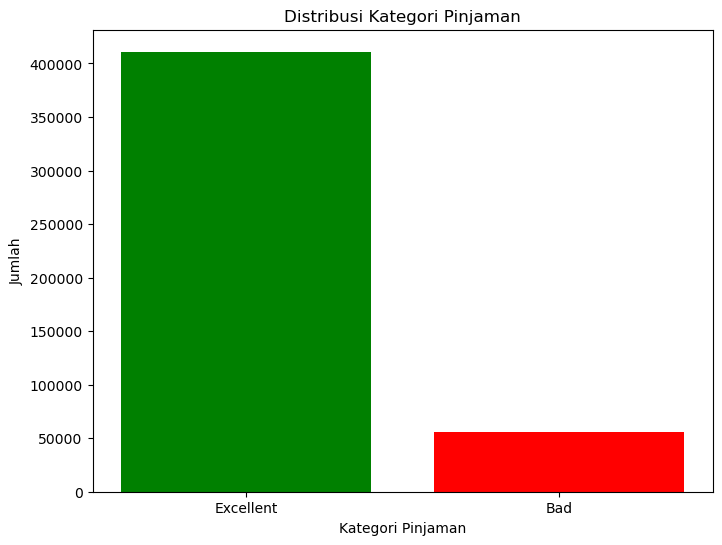

In [12]:
# Menghitung jumlah setiap kategori pinjaman
jumlah_kategori_pinjaman = df['loan_category'].value_counts()

# Menentukan warna untuk setiap kategori pinjaman
warna_kategori = ['green', 'red']

# Membuat plot distribusi kategori pinjaman
plt.figure(figsize=(8, 6))
plt.bar(jumlah_kategori_pinjaman.index, jumlah_kategori_pinjaman.values, color=warna_kategori)
plt.xlabel('Kategori Pinjaman')
plt.ylabel('Jumlah')
plt.title('Distribusi Kategori Pinjaman')

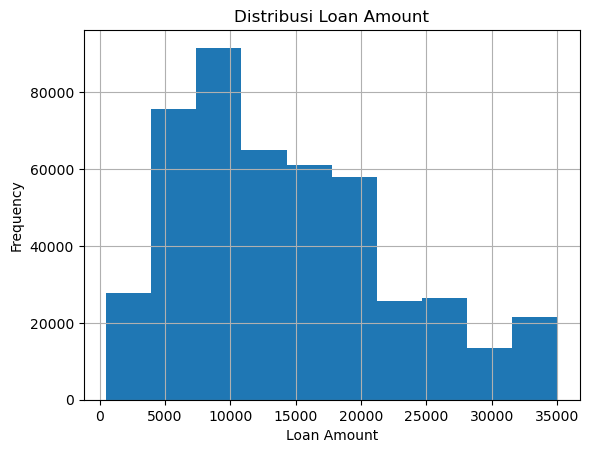

In [13]:
# Histogram untuk distribusi loan_amnt

df['loan_amnt'].hist()
plt.title('Distribusi Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

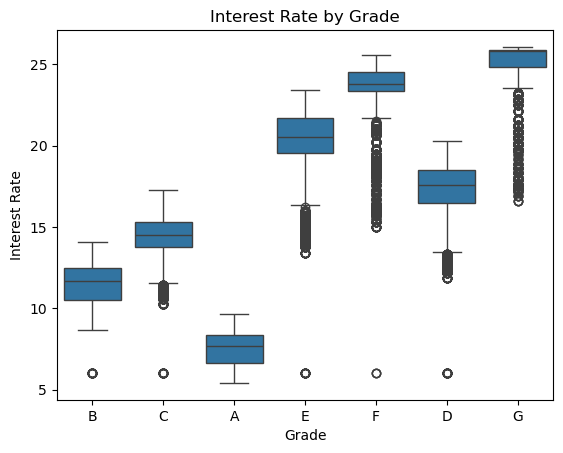

In [14]:
# Boxplot untuk melihat distribusi interest rate berdasarkan grade

sns.boxplot(x=df['grade'], y=df['int_rate'])
plt.title('Interest Rate by Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()

# Data Preparation

In [16]:
# Menghapus Kolom yang memiliki missing value

threshold = len(df) * 0.7
df_clean = df.dropna(axis=1, thresh=threshold)

In [17]:
df_clean.shape

(466285, 54)

In [18]:
# Melakukan pengecekan Kolom yang sudah dibersihkan

df_clean.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'loan_category'],
      dtype='object')

In [19]:
for column in df_clean.columns:
    value_counts = df_clean[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for Unnamed: 0:
Unnamed: 0
0         1
310839    1
310865    1
310864    1
310863    1
         ..
155424    1
155423    1
155422    1
155421    1
466284    1
Name: count, Length: 466285, dtype: int64

Value counts for id:
id
1077501     1
26180404    1
26219322    1
26239577    1
26290537    1
           ..
3714715     1
3703738     1
3731030     1
3705772     1
9199665     1
Name: count, Length: 466285, dtype: int64

Value counts for member_id:
member_id
1296599     1
28653081    1
28692177    1
28702376    1
28763241    1
           ..
4686866     1
4847180     1
4724047     1
4678105     1
11061576    1
Name: count, Length: 466285, dtype: int64

Value counts for loan_amnt:
loan_amnt
10000    33023
12000    25519
15000    23486
20000    22759
35000    16596
         ...  
34250        1
33400        1
32150        1
34325        1
33175        1
Name: count, Length: 1352, dtype: int64

Value counts for funded_amnt:
funded_amnt
10000    32930
12000    25426
15000    2337

Value counts for revol_util:
revol_util
0.00      2284
58.00      864
53.00      850
59.00      845
61.00      832
          ... 
8.49         1
88.48        1
7.43         1
11.63        1
141.80       1
Name: count, Length: 1269, dtype: int64

Value counts for total_acc:
total_acc
21.0     17087
20.0     17073
22.0     17028
23.0     16719
19.0     16709
         ...  
106.0        1
156.0        1
101.0        1
96.0         1
118.0        1
Name: count, Length: 112, dtype: int64

Value counts for initial_list_status:
initial_list_status
f    303005
w    163280
Name: count, dtype: int64

Value counts for out_prncp:
out_prncp
0.00        229999
5684.61         80
6563.61         79
5617.88         78
6110.65         76
             ...  
788.62           1
2656.39          1
602.44           1
18067.18         1
3984.38          1
Name: count, Length: 135665, dtype: int64

Value counts for out_prncp_inv:
out_prncp_inv
0.00        229999
6563.61         78
5684.61         77
5617.88  

In [20]:
# Menghapus Kolom Yang tidak diperlukan

unused_col = ['policy_code', 'application_type', 'Unnamed: 0', 'id', 'member_id','issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                   'last_pymnt_d', 'last_pymnt_amnt', 'zip_code', 'title', 'emp_title','loan_status', 'url']

drop_data = df_clean[unused_col]

df_clean.drop(columns=unused_col, axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7156\380209075.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=unused_col, axis=1, inplace=True)


In [21]:
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_category
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,83.7,9.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,9.4,4.0,f,Sep-13,0.0,0.0,NaN,NaN,NaN,Bad
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,98.5,10.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,21.0,37.0,f,Jan-15,0.0,0.0,NaN,NaN,NaN,Excellent
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,53.9,38.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent


In [22]:
# Mengidentifikasi outlier menggunakan IQR

Q1 = df_clean['loan_amnt'].quantile(0.25)
Q3 = df_clean['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
df_cleansing = df_clean[~((df_clean['loan_amnt'] < (Q1 - 1.5 * IQR)) | (df_clean['loan_amnt'] > (Q3 + 1.5 * IQR)))]

In [23]:
# Melakukan Frequency Encoding untuk kolom kategorikal

categorical_columns = df_cleansing.select_dtypes(include=['object']).columns

for column in categorical_columns:
    frequency_encoding = df_cleansing[column].value_counts().to_dict()
    df_cleansing[column] = df_cleansing[column].map(frequency_encoding)

# Mengisi nilai yang hilang dengan median setelah encoding
df_cleansing.fillna(df_cleansing.median(), inplace=True)

print(df_cleansing.head())

   loan_amnt  funded_amnt  funded_amnt_inv    term  int_rate  installment  \
0       5000         5000           4975.0  337953     10.65       162.87   
1       2500         2500           2500.0  128332     15.27        59.83   
2       2400         2400           2400.0  337953     15.96        84.33   
3      10000        10000          10000.0  337953     13.49       339.31   
4       3000         3000           3000.0  128332     12.69        67.79   

    grade  sub_grade  emp_length  home_ownership  ...  revol_util  total_acc  \
0  136929      26610    150049.0          188473  ...        83.7        9.0   
1  125293      24105     36265.0          188473  ...         9.4        4.0   
2  125293      22178    150049.0          188473  ...        98.5       10.0   
3  125293      26953    150049.0          188473  ...        21.0       37.0   
4  136929      25252     29622.0          188473  ...        53.9       38.0   

   initial_list_status  last_credit_pull_d  collections_

In [24]:
scaler = StandardScaler()
numerical_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc']
df_cleansing[numerical_columns] = scaler.fit_transform(df_cleansing[numerical_columns])

In [25]:
# Memilih hanya kolom numerik

numerical_columns = df_cleansing.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df_cleansing[numerical_columns]

In [26]:
# Menghitung matriks korelasi

corr_matrix = df_numerical.corr()

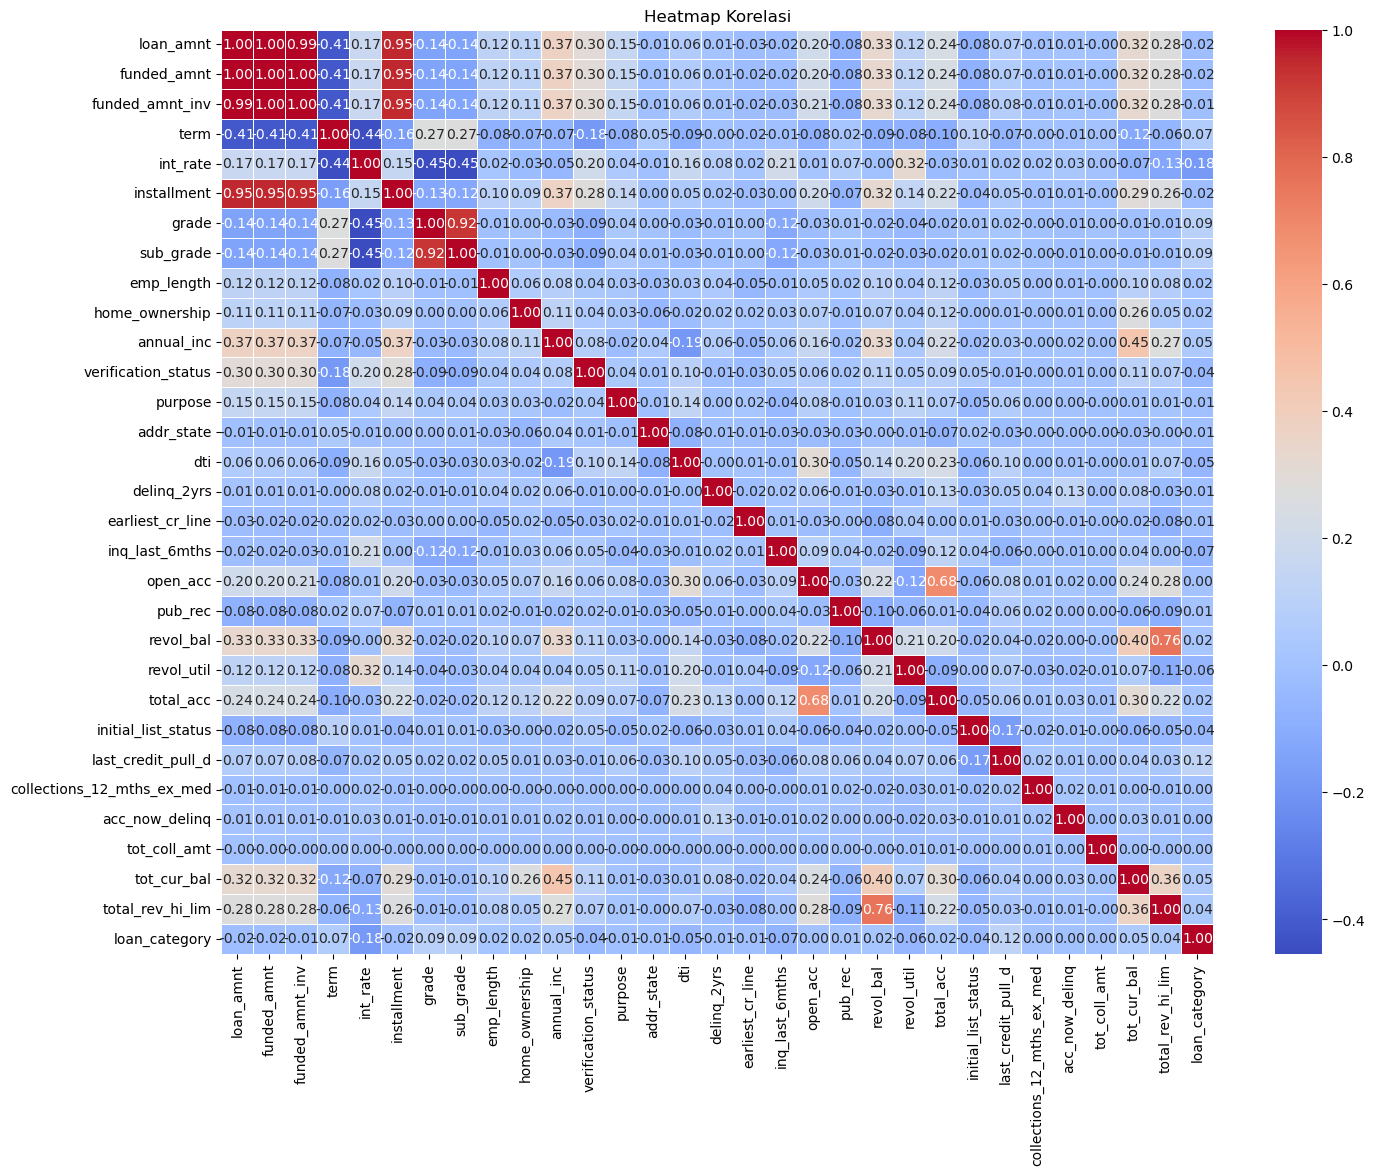

In [27]:
# Membuat heatmap korelasi

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [28]:
X = df_cleansing.drop('loan_category', axis=1)
Y = df_cleansing['loan_category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
# Normalize features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
# Pelatihan model Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [31]:
# Pelatihan model Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [32]:
# Pelatihan model K-Nearest Neighbors

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

# Evaluation

In [33]:
# Inisialisasi model yang berbeda
results = {}
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Inisialisasi dictionary untuk laporan klasifikasi
classification_reports = {}
model_names = []
accuracies = []

# Melakukan Train and evaluate untuk tiap model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, Y_train)

    print(f"Evaluating {model_name}...")
    Y_pred = model.predict(X_test)

    confusion = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(
        Y_test, Y_pred, target_names=['Good', 'Bad'], zero_division=1  # Handle zero division
    )

    # Menyimpan laporan classification di dictionary
    classification_reports[model_name] = classification_rep

    accuracy = accuracy_score(Y_test, Y_pred)

    model_names.append(model_name)
    accuracies.append(accuracy)

    print("\nClassification Report:")
    print(classification_rep)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("=" * 50)

Training Logistic Regression...
Evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

        Good       0.48      0.01      0.01     11080
         Bad       0.88      1.00      0.94     82177

    accuracy                           0.88     93257
   macro avg       0.68      0.50      0.47     93257
weighted avg       0.83      0.88      0.83     93257

Logistic Regression Accuracy: 0.8811
Training Random Forest...
Evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

        Good       0.56      0.04      0.08     11080
         Bad       0.89      1.00      0.94     82177

    accuracy                           0.88     93257
   macro avg       0.72      0.52      0.51     93257
weighted avg       0.85      0.88      0.83     93257

Random Forest Accuracy: 0.8822
Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...

Classification Report:
              precis

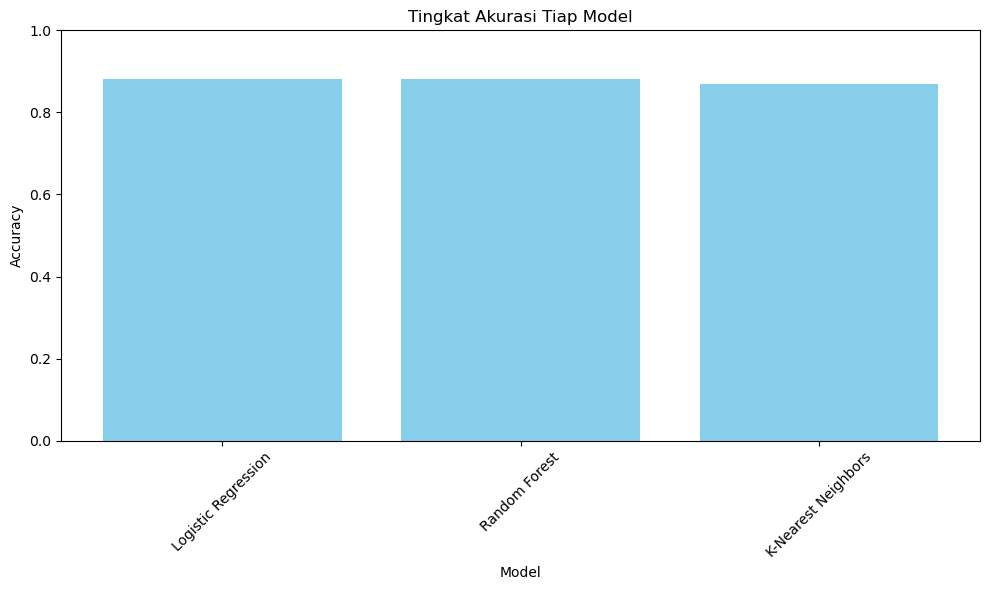

In [34]:
# Create a bar plot to visualize accuracies

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Tingkat Akurasi Tiap Model')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [35]:
X_o = df_cleansing.drop(['loan_category'], axis=1)
y_o = df_cleansing['loan_category']

In [36]:
oversample = RandomOverSampler(sampling_strategy = 'not majority')
X_over, y_over = oversample.fit_resample(X_o, y_o)

In [37]:
X_train_over, X_test_over, Y_train_over, Y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()
X_train_over = scaler.fit_transform(X_train_over)
X_test_over = scaler.fit_transform(X_test_over)

In [39]:
# Inisialisasi model yang berbeda
results = {}
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Inisialisasi dictionary untuk laporan klasifikasi
classification_reports = {}
model_names_over = []
accuracies_over = []

# Melakukan Train and evaluate untuk tiap model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_over, Y_train_over)

    print(f"Evaluating {model_name}...")
    Y_pred = model.predict(X_test_over)

    confusion = confusion_matrix(Y_test_over, Y_pred)
    classification_rep = classification_report(
        Y_test_over, Y_pred, target_names=['Good', 'Bad'], zero_division=1  # Handle zero division
    )

    # Menyimpan laporan classification di dictionary
    classification_reports[model_name] = classification_rep

    accuracy = accuracy_score(Y_test_over, Y_pred)

    model_names_over.append(model_name)
    accuracies_over.append(accuracy)

    print("\nClassification Report:")
    print(classification_rep)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("=" * 50)

Training Logistic Regression...
Evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

        Good       0.64      0.64      0.64     81995
         Bad       0.64      0.64      0.64     82387

    accuracy                           0.64    164382
   macro avg       0.64      0.64      0.64    164382
weighted avg       0.64      0.64      0.64    164382

Logistic Regression Accuracy: 0.6418
Training Random Forest...
Evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

        Good       0.98      0.99      0.99     81995
         Bad       0.99      0.98      0.99     82387

    accuracy                           0.99    164382
   macro avg       0.99      0.99      0.99    164382
weighted avg       0.99      0.99      0.99    164382

Random Forest Accuracy: 0.9866
Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...

Classification Report:
              precis

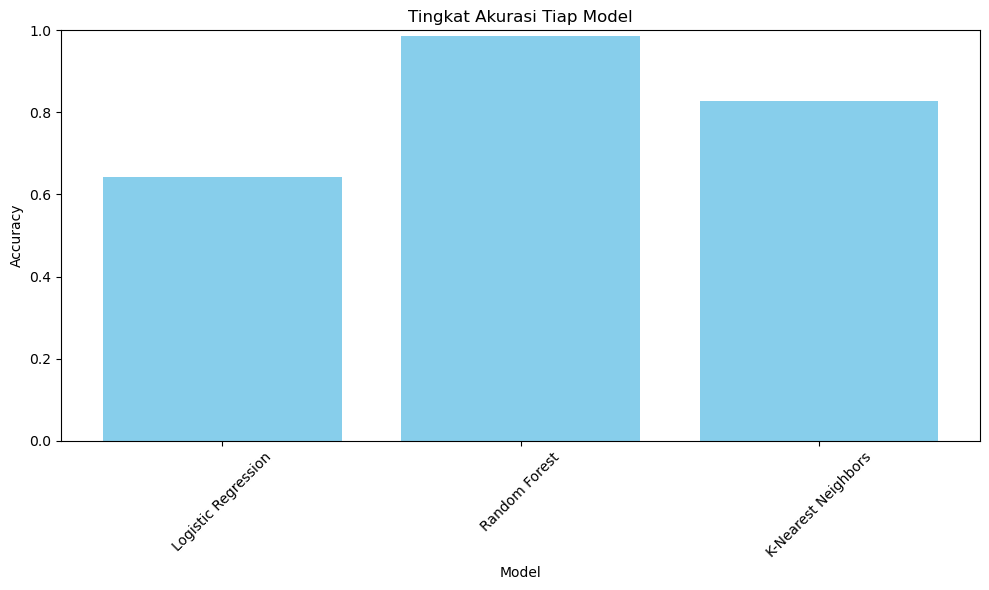

In [40]:
# Create a bar plot to visualize accuracies

plt.figure(figsize=(10, 6))
plt.bar(model_names_over, accuracies_over, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Tingkat Akurasi Tiap Model')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# KESIMPULAN

Berdasarkan hasil analisis yang telah saya lakukan menggunakna 3 model machine learning yang berbeda yaitu Logistic Regression, Random Forest, dan K-Nearest Neighbors, didapati perbandingan hasil dari Logistic Regression 0.6418, Random Forest 0.9866, K-Nearest Neighbors 0.8268. sehingga dapat disimpulakn, bahwa model machine learning dengan tingkat akurasi tertinggi adalah Random Forest sebesar 0.9866